In [47]:
import os, sys
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils.np_utils import to_categorical


"""선형 모델 생성."""
model = Sequential() 

"""3개 클래스 넣기"""
model.add(Conv2D(32, (3, 3), input_shape = (64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#이전 CNN레이어에서 나온 3차원 배열을 1차원으로 뽑아줌.
model.add(Flatten()) # Fully conected 형태로 변경.

model.add(Dense(64)) # 결과값 64개 출력. 입력값은 직전 레이어에서 자동으로 받아옴
model.add(Activation('relu'))
model.add(Dropout(0.5)) # drop out의 비율을 0.5 증 50%로 한다.
model.add(Dense(1)) #결과값 1개 출력.
model.add(Activation('sigmoid')) #출력할려는 결과값이 3개 이상인 다중일땐
                                 #softmax 함수를 사용.


In [48]:

# model 컴파일
model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics=['accuracy'])




In [49]:


train_dir = 'img/train' 
validation_dir = 'img/validation'
test_dir = 'img/test'


batch_size = 16


#학습 이미지에 적용할 augmentation인자를 지정
"""train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)"""
train_datagen = ImageDataGenerator(rescale = 1./255)



#검증과 테스트 이미지는 augmentation 적용 X
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


#이미지를 배치단위로 불러와주는 generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64,64),
    batch_size = batch_size,
    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (64,64),
    batch_size = batch_size,
    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (64,64),
    batch_size = batch_size,
    class_mode = 'binary')


results = model.fit_generator(
    train_generator,
    steps_per_epoch=1000 // batch_size,
    epochs=50,
    validation_data = validation_generator,
    validation_steps = 30
    )
model.save_weights('first_try.h5') #모델저장

Found 961 images belonging to 2 classes.
Found 354 images belonging to 2 classes.
Found 356 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 5s 76ms/step - loss: 0.6953 - accuracy: 0.5558 - val_loss: 0.6852 - val_accuracy: 0.6073
Epoch 2/50
62/62 [==============================] - 4s 61ms/step - loss: 0.6654 - accuracy: 0.6059 - val_loss: 0.6799 - val_accuracy: 0.6223
Epoch 3/50
62/62 [==============================] - 4s 59ms/step - loss: 0.6187 - accuracy: 0.6960 - val_loss: 0.4918 - val_accuracy: 0.7361
Epoch 4/50
62/62 [==============================] - 4s 61ms/step - loss: 0.5969 - accuracy: 0.7110 - val_loss: 0.6008 - val_accuracy: 0.6881
Epoch 5/50
62/62 [==============================] - 4s 59ms/step - loss: 0.5394 - accuracy: 0.7460 - val_loss: 0.4996 - val_accuracy: 0.6931
Epoch 6/50
62/62 [==============================] - 4s 60ms/step - loss: 0.4950 - accuracy: 0.7615 - val_loss: 0.5448 - val_accuracy: 0.6245
Epoch 7/50
62/62 [=============

loss :  0.18330156292616054
acc :  0.91769904

val_loss :  0.9777525128087063
val_acc :  0.7334260737895966


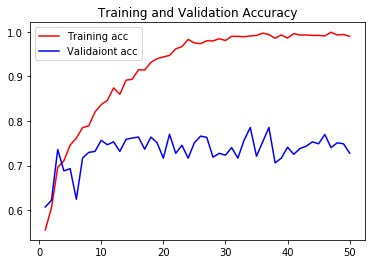

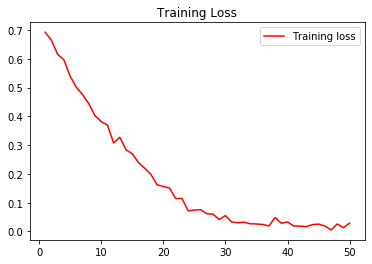

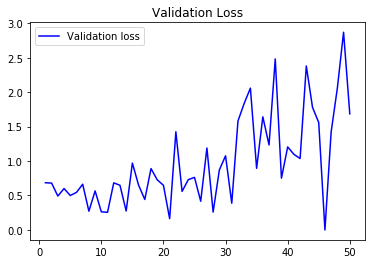

In [50]:
import matplotlib.pyplot as plt
import numpy as np

history_data = results.history
history_data.keys()

loss = history_data['loss']
acc = history_data['accuracy']
val_loss = history_data['val_loss']
val_acc = history_data['val_accuracy']

print("loss : ", np.mean(loss))
print("acc : ", np.mean(acc))
print()
print("val_loss : ", np.mean(val_loss))
print("val_acc : ", np.mean(val_acc))



epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validaiont acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.title('Training Loss')
plt.legend()
plt.show()

plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Validation Loss')
plt.legend()
plt.show()

In [ ]:
"""
training data set의 accuracy는 높은데
Validation data set의 accuracy는 낮다.
-=> training set에 Overfitting이 됐을 수 있다.
따라서 epochs를 줄여서 재시도
"""

"""
results = model.fit_generator(
    train_generator,
    steps_per_epoch=1000 // batch_size,
    epochs=30,
    validation_data = validation_generator,
    validation_steps = 50
    )
"""


"""
대 실패. CPU 살살녹는다~
"""



In [51]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)
print("test_acc : ", test_acc)
print("test_loss: ", test_loss)

test_acc :  0.7577319741249084
test_loss:  2.25844144821167


In [64]:
new_img_dir = 'img/predict_img'

new_img_datagen = ImageDataGenerator(rescale = 1./255)

new_img_generator = new_img_datagen.flow_from_directory(
        new_img_dir,
        target_size = (64, 64),
        batch_size = 16,
        class_mode = 'binary')


new_img = model.predict_generator(new_img_generator)


np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(new_img_generator.class_indices)
print(new_img)



Found 4 images belonging to 1 classes.
{'handsome': 0}
[[0.002]
 [0.001]
 [0.000]
 [1.000]]


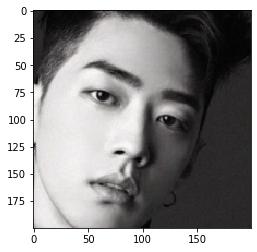

[[Handsome -> 100.00%]]


In [67]:
import cv2
import numpy as np


img = cv2.imread('img/predict_img/handsome/handsome_1_Gray.jpg',cv2.IMREAD_COLOR)
img2 = img

img = cv2.resize(img, dsize=(64,64), interpolation = cv2.INTER_AREA)
img = img.astype('float32') / 255
img = img.reshape((1,64,64,3))


predict_img = model.predict(img, steps =1)

plt.imshow(img2)
plt.show()

np.set_printoptions(formatter={'float': lambda x: "Handsome -> {0:0.2f}%".format(x*100)})
print(predict_img)



In [68]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64,64),
    batch_size = batch_size,
    class_mode = 'binary')


results = model.fit_generator(
    train_generator,
    steps_per_epoch=1000 // batch_size,
    epochs=100,
    validation_data = validation_generator,
    validation_steps = 30
    )



Found 961 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 5s 75ms/step - loss: 0.8367 - accuracy: 0.5118 - val_loss: 0.6832 - val_accuracy: 0.4700
Epoch 2/100
62/62 [==============================] - 4s 70ms/step - loss: 0.7075 - accuracy: 0.5036 - val_loss: 0.7113 - val_accuracy: 0.4442
Epoch 3/100
62/62 [==============================] - 4s 71ms/step - loss: 0.6953 - accuracy: 0.5118 - val_loss: 0.6823 - val_accuracy: 0.6695
Epoch 4/100
62/62 [==============================] - 5s 74ms/step - loss: 0.6909 - accuracy: 0.5803 - val_loss: 0.6603 - val_accuracy: 0.5819
Epoch 5/100
62/62 [==============================] - 4s 73ms/step - loss: 0.6946 - accuracy: 0.5415 - val_loss: 0.6877 - val_accuracy: 0.6330
Epoch 6/100
62/62 [==============================] - 5s 73ms/step - loss: 0.6819 - accuracy: 0.5742 - val_loss: 0.7075 - val_accuracy: 0.6888
Epoch 7/100
62/62 [==============================] - 5s 73ms/step - loss: 0.6955 - accuracy: 0.6008 - val_l

62/62 [==============================] - 5s 77ms/step - loss: 0.6100 - accuracy: 0.6796 - val_loss: 0.6230 - val_accuracy: 0.6524
Epoch 59/100
62/62 [==============================] - 5s 78ms/step - loss: 0.6267 - accuracy: 0.6755 - val_loss: 0.7661 - val_accuracy: 0.6910
Epoch 60/100
62/62 [==============================] - 5s 78ms/step - loss: 0.6211 - accuracy: 0.6960 - val_loss: 0.7552 - val_accuracy: 0.6881
Epoch 61/100
62/62 [==============================] - 5s 75ms/step - loss: 0.6009 - accuracy: 0.6847 - val_loss: 0.6718 - val_accuracy: 0.6695
Epoch 62/100
62/62 [==============================] - 5s 73ms/step - loss: 0.6204 - accuracy: 0.6530 - val_loss: 0.5321 - val_accuracy: 0.7253
Epoch 63/100
62/62 [==============================] - 5s 75ms/step - loss: 0.6124 - accuracy: 0.6673 - val_loss: 0.4976 - val_accuracy: 0.6903
Epoch 64/100
62/62 [==============================] - 4s 71ms/step - loss: 0.6429 - accuracy: 0.7042 - val_loss: 0.4661 - val_accuracy: 0.7639
Epoch 65/100

loss :  0.6246835694931763
acc :  0.66630614

val_loss :  0.6548613692820072
val_acc :  0.6974240377545357


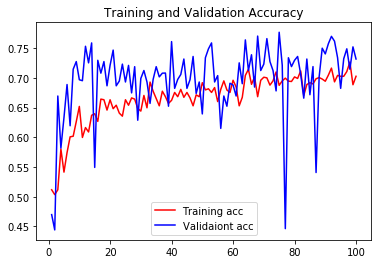

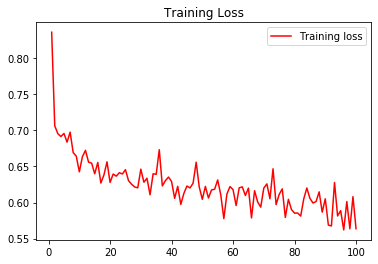

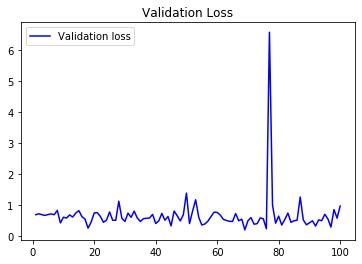

In [69]:
import matplotlib.pyplot as plt
import numpy as np

history_data = results.history
history_data.keys()

loss = history_data['loss']
acc = history_data['accuracy']
val_loss = history_data['val_loss']
val_acc = history_data['val_accuracy']

print("loss : ", np.mean(loss))
print("acc : ", np.mean(acc))
print()
print("val_loss : ", np.mean(val_loss))
print("val_acc : ", np.mean(val_acc))



epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validaiont acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.title('Training Loss')
plt.legend()
plt.show()

plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Validation Loss')
plt.legend()
plt.show()

In [71]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)
print("test_acc : ", test_acc)
print("test_loss: ", test_loss)

test_acc :  0.7886598110198975
test_loss:  0.773705780506134


In [1]:
import cv2
import numpy as np


img = cv2.imread('img/predict_img/low/train.jpg',cv2.IMREAD_COLOR)
img2 = img

img = cv2.resize(img, dsize=(64,64), interpolation = cv2.INTER_AREA)
img = img.astype('float32') / 255
img = img.reshape((1,64,64,3))


predict_img = model.predict(img, steps =1)

plt.imshow(img2)
plt.show()

np.set_printoptions(formatter={'float': lambda x: "Handsome -> {0:0.2f}%".format(x*100)})
print(predict_img)

NameError: name 'model' is not defined

In [103]:
new_img_dir = 'img/predict_img'

new_img_datagen = ImageDataGenerator(rescale = 1./255)

new_img_generator = new_img_datagen.flow_from_directory(
        new_img_dir,
        target_size = (64, 64),
        batch_size = 16,
        class_mode = 'binary')


new_img = model.predict_generator(new_img_generator)


np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(new_img_generator.class_indices)
print(new_img)



Found 15 images belonging to 2 classes.
{'handsome': 0, 'low': 1}
[[0.818]
 [0.725]
 [0.450]
 [0.802]
 [0.762]
 [0.065]
 [0.923]
 [0.848]
 [0.876]
 [0.492]
 [0.689]
 [0.977]
 [0.618]
 [0.995]
 [0.865]]


In [108]:
from keras import layers
from keras import models


"""선형 모델 생성."""
model = Sequential() 

"""3개 클래스 넣기"""
model.add(Conv2D(32, (3, 3), input_shape = (64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#이전 CNN레이어에서 나온 3차원 배열을 1차원으로 뽑아줌.
model.add(Flatten()) # Fully conected 형태로 변경.

model.add(Dense(64, activation = 'relu')) # 결과값 64개 출력. 입력값은 직전 레이어에서 자동으로 받아옴
#model.add(Activation('relu'))
model.add(Dropout(0.5)) # drop out의 비율을 0.5 증 50%로 한다.
model.add(Dense(3,activation = 'softmax')) #결과값 3개 출력.
#model.add(Activation('softmax')) #출력할려는 결과값이 3개 이상인 다중일땐
                                 #softmax 함수를 사용.

In [110]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_35 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_36 (Activation)   (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 64)       

In [113]:
train_dir = 'img/train' 
validation_dir = 'img/validation'
test_dir = 'img/test'


batch_size = 16


#학습 이미지에 적용할 augmentation인자를 지정
"""train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)"""
train_datagen = ImageDataGenerator(rescale = 1./255)



#검증과 테스트 이미지는 augmentation 적용 X
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


#이미지를 배치단위로 불러와주는 generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64,64),
    batch_size = batch_size,
    class_mode = 'categorical') #binary 에서 categorical로 변경. 클라스가 3개라서.

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (64,64),
    batch_size = batch_size,
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (64,64),
    batch_size = batch_size,
    class_mode = 'categorical')


Found 961 images belonging to 2 classes.
Found 354 images belonging to 2 classes.
Found 356 images belonging to 2 classes.


In [115]:
# model 컴파일
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics=['accuracy'])
"""
results = model.fit_generator(
    train_generator,
    steps_per_epoch=1000 // batch_size,
    epochs=50,
    validation_data = validation_generator,
    validation_steps = 30
    )"""
#### 3가지 클래스로 시도해볼꺼임. normal 클래스 사진 구해야됨 ㅎ

'\nresults = model.fit_generator(\n    train_generator,\n    steps_per_epoch=1000 // batch_size,\n    epochs=50,\n    validation_data = validation_generator,\n    validation_steps = 30\n    )'